In [3]:
#Write down code to import libraries important for Machine Learning and Data Analysis/Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Write down code to import the dataset

df = pd.read_csv(r'Data\players_22.csv', index_col=0)

C:\Users\h1181\AppData\Local\Temp\ipykernel_7216\4199731666.py:10: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Data\players_22.csv', index_col=0)


In [4]:
#Solution to DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
df = pd.read_csv(r'Data\players_22.csv', index_col=0, low_memory=False)

In [5]:
#Wri
print(df.head(5))
print("Tail:")
print(df.tail())
print("Describe:")
print(df.describe())
print("Shape:")
print(df.shape)
print("Info:")
df.info()


                                                  player_url  \
sofifa_id                                                      
158023     https://sofifa.com/player/158023/lionel-messi/...   
188545     https://sofifa.com/player/188545/robert-lewand...   
20801      https://sofifa.com/player/20801/c-ronaldo-dos-...   
190871     https://sofifa.com/player/190871/neymar-da-sil...   
192985     https://sofifa.com/player/192985/kevin-de-bruy...   

                  short_name                            long_name  \
sofifa_id                                                           
158023              L. Messi       Lionel Andrés Messi Cuccittini   
188545        R. Lewandowski                   Robert Lewandowski   
20801      Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   
190871             Neymar Jr        Neymar da Silva Santos Júnior   
192985          K. De Bruyne                      Kevin De Bruyne   

          player_positions  overall  potential    value_eur  wage_e

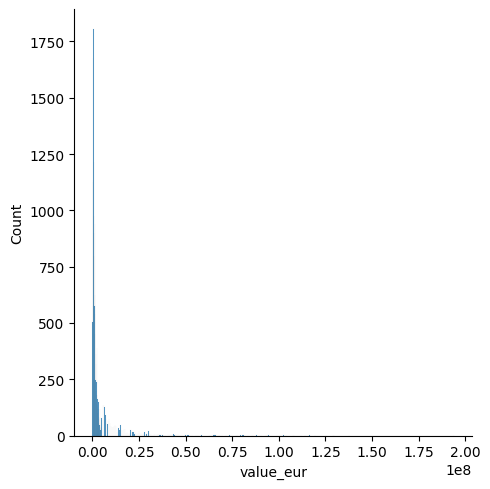

In [ ]:
df.describe()

In [7]:
#Installing and importing dependencies for ProfileReport

import numpy as np
import pandas as pd
from ydata_profiling import ProfileReport

In [48]:
#Loading profile report on our dataset to get an approximate EDA and more info about the dataset

profile = ProfileReport(df, minimal=True)
profile.to_file("your_report.html")

Export report to file: 100%|██████████| 1/1 [00:00<00:00, 41.10it/s]


In [9]:
#Perform Data Cleaning and Data Preprocessing - delete duplicate rows, handle missing values, handle outliers, handle categorical data, etc.

#Drop duplicate rows
df.drop_duplicates(inplace=True)

In [ ]:
#create a list with all player_positions and then create a dictionary with the player_positions as keys and the number of players in each position as values
player_positions = df['player_positions'].tolist()
player_positions_dict = {}
for position in player_positions:
    if position in player_positions_dict:
        player_positions_dict[position] += 1
    else:
        player_positions_dict[position] = 1

#sort the dictionary by values in descending order
player_positions_dict = dict(sorted(player_positions_dict.items(), key=lambda item: item[1], reverse=True))

player_positions_dict

In [ ]:
possible_positions = []

for position in player_positions_dict:
    for x in position.split(','):
        if x.strip() not in possible_positions:
            possible_positions.append(x.strip())

possible_positions

In [41]:
#create dict with possible positions as keys and number of players in each position as values
possible_positions_dict = {}
for position in possible_positions:
    possible_positions_dict[position] = "Name"

possible_positions_dict



{'CB': 'Name',
 'GK': 'Name',
 'ST': 'Name',
 'CDM': 'Name',
 'CM': 'Name',
 'LB': 'Name',
 'RB': 'Name',
 'CAM': 'Name',
 'LM': 'Name',
 'RM': 'Name',
 'LWB': 'Name',
 'RW': 'Name',
 'LW': 'Name',
 'RWB': 'Name',
 'CF': 'Name'}

In [66]:
#make a smaller subset of df with only the player_positions and player_name columns
df_subset = df[['player_positions', 'short_name', 'overall']]
df_subset

for position in possible_positions_dict:
    print(position)
    df_subset[position] = df_subset['player_positions'].apply(lambda x: 1 if position in x else 0)

df_subset

for position in df_subset['player_positions']:
    for x in position.split(', '):
        print(x)
        print(df_subset['short_name'])



CB
GK
ST
CDM
CM
LB
RB
CAM
LM
RM
LWB
RW
LW
RWB


C:\Users\h1181\AppData\Local\Temp\ipykernel_7216\373258125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[position] = df_subset['player_positions'].apply(lambda x: 1 if position in x else 0)
C:\Users\h1181\AppData\Local\Temp\ipykernel_7216\373258125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[position] = df_subset['player_positions'].apply(lambda x: 1 if position in x else 0)
C:\Users\h1181\AppData\Local\Temp\ipykernel_7216\373258125.py:7: SettingWithCopyWarning: 
A value is

CF
RW
sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. Porter
262760              N. Logue
262820             L. Rudden
264540    E. Lalchhanchhuaha
Name: short_name, Length: 19239, dtype: object
ST
sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. Porter
262760              N. Logue
262820             L. Rudden
264540    E. Lalchhanchhuaha
Name: short_name, Length: 19239, dtype: object
CF
sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. P

C:\Users\h1181\AppData\Local\Temp\ipykernel_7216\373258125.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_subset[position] = df_subset['player_positions'].apply(lambda x: 1 if position in x else 0)


sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. Porter
262760              N. Logue
262820             L. Rudden
264540    E. Lalchhanchhuaha
Name: short_name, Length: 19239, dtype: object
CM
sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. Porter
262760              N. Logue
262820             L. Rudden
264540    E. Lalchhanchhuaha
Name: short_name, Length: 19239, dtype: object
CDM
sofifa_id
158023              L. Messi
188545        R. Lewandowski
20801      Cristiano Ronaldo
190871             Neymar Jr
192985          K. De Bruyne
                 ...        
261962             Song Defu
262040             C. Porter

KeyboardInterrupt: 